(489, 9)


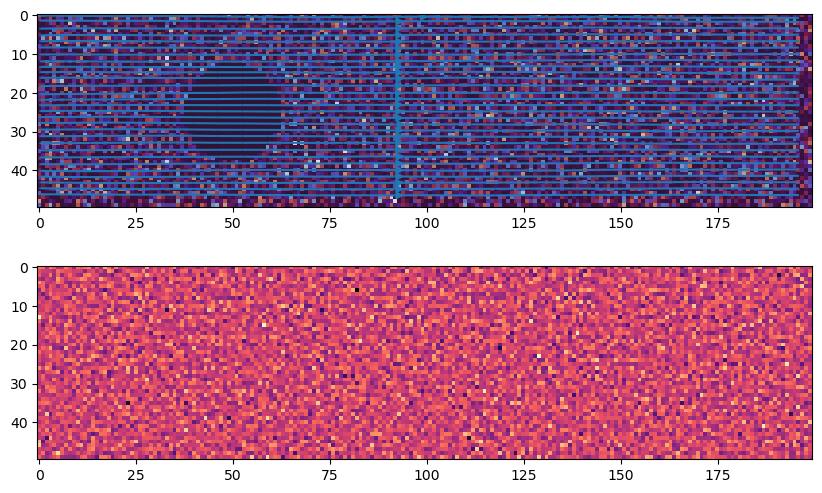

(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)


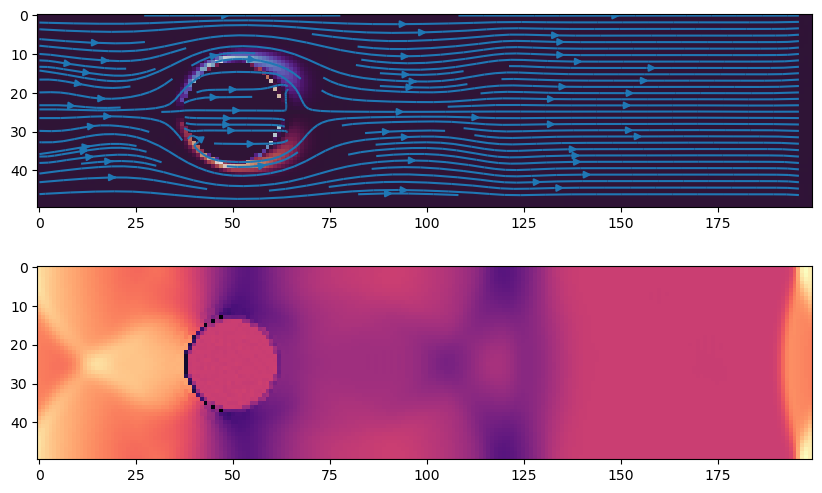

(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)
(489, 9)


KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Simulation parameters
Nx          = 200    # resolution x-dir
Ny          = 50    # resolution y-dir
rho0        = 100    # average density
tau         = 0.6    # collision timescale
Nt          = 10000  # number of timesteps

# Lattice speeds / weights
NL = 9
idxs = np.arange(NL)
cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1
X, Y = np.meshgrid(range(Nx), range(Ny))

# Initial Conditions - flow to the right with some perturbations
F = np.ones((Ny,Nx,NL)) + 0.01*np.random.randn(Ny,Nx,NL)
F[:,:,3] += 2 * (1)#+0.2*np.cos(2*np.pi*X/Nx*4))
rho = np.sum(F,2)
for i in idxs:
  F[:,:,i] *= rho0 / rho

# Cylinder boundary
cylinder = (X - Nx/4)**2 + (Y - Ny/2)**2 < (Ny/4)**2


# Simulation Main Loop
for it in range(Nt):
  
  # Drift
  for i, cx, cy in zip(idxs, cxs, cys):
    F[:,:,i] = np.roll(F[:,:,i], cx, axis=1)
    F[:,:,i] = np.roll(F[:,:,i], cy, axis=0)
  
  # Set reflective boundaries
  bndryF = F[cylinder,:]
  bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
  print(bndryF.shape)
  
  # Calculate fluid variables
  rho = np.sum(F,2)
  ux  = np.sum(F*cxs,2) / rho
  uy  = np.sum(F*cys,2) / rho
  if it % 100 == 0:
    w = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
    w[cylinder] = 0.0
    fig,ax = plt.subplots(2,1, figsize=(10,6))
    ax[0].imshow(w, cmap='twilight')
    ax[1].imshow(rho, cmap='magma')
    ax[0].streamplot(X[::4,::4], Y[::4,::4], ux[::4,::4], uy[::4,::4])
    #plt.clim(-0.1,0.1)
    #plt.colorbar()
    plt.show()
  # Apply Collision
  Feq = np.zeros(F.shape)
  for i, cx, cy, w in zip(idxs, cxs, cys, weights):
    Feq[:,:,i] = rho*w* (1 + 3*(cx*ux+cy*uy) + 9*(cx*ux+cy*uy)**2/2 - 3*(ux**2+uy**2)/2)
  
  F += -(1.0/tau) * (F - Feq)
  
  # Apply boundary 
  F[cylinder,:] = bndryF

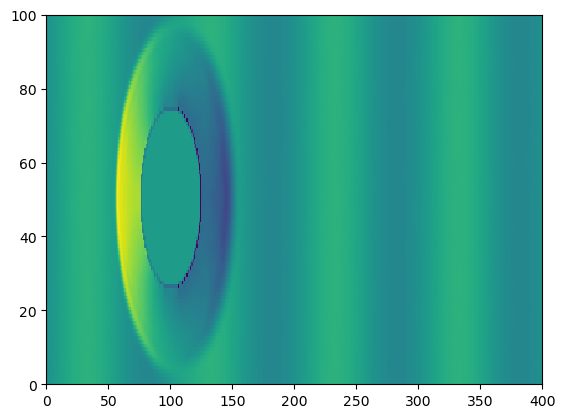

In [5]:
plt.pcolormesh(rho)